In [1]:
import numpy as np
from scipy.special import expit

### Create NeuralNetwork Class: Multi Layer Perceptron

In [3]:
# Define NN class
class NeuralNetwork(object):
    # Initialize NN
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # Nodes
        self.in_nodes = input_nodes
        self.hn_nodes = hidden_nodes
        self.ot_nodes = output_nodes
        # Learning rate
        self.learning_rate = learning_rate
        
        # Weight Matix
        ## Weight, input layer to hidden layer
        ## np.random.normal(center, standard_deviation, dimension)
        self.wih = np.random.normal(0.0, pow(self.hn_nodes, -0.5), (self.hn_nodes, self.in_nodes))
        ## Weight, hidden layer to output layer
        self.who = np.random.normal(0.0, pow(self.ot_nodes, -0.5), (self.ot_nodes, self.hn_nodes))
        
        # Activation function
        self.activation_function = lambda x: expit(x)
        
    # Training logic
    def train(self, input_list, target_list):
        # FeedForward
        ## Transform list to 2-dimensional transposed ndarray(to column vector)
        inputs = np.array(input_list, ndmin=2).T
        targets = np.array(target_list, ndmin=2).T
        
        ## Operate input signal to hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        ## Operate ouput signal from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        ## Operate hidden signal to output layer
        output_inputs = np.dot(self.who, hidden_outputs)
        ## Operate output
        output_outputs = self.activation_function(output_inputs)
        
        # Back Propagation
        ## Errors
        output_errors = targets - output_outputs
        ## Hidden layers' errors
        hidden_errors = np.dot(self.who.T, output_errors)
        
        ## Update weight between output and hidden layers
        self.who += self.learning_rate * np.dot((output_errors * output_outputs * (1-output_outputs)),
                                                np.transpose(hidden_outputs))
        ## Update weight between hidden and input layers
        self.wih += self.learning_rate * np.dot((hidden_errors * hidden_outputs * (1-hidden_outputs)),
                                                np.transpose(inputs))
    def query(self, input_list):
        # Transform list to 2-dimensional transposed ndarray(to column vector)
        inputs = np.array(input_list, ndmin=2).T
        # Input to hidden layer
        hidden_inputs = np.dot(self.wih, inputs)
        # Outputs from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        # Hidden to output layer
        output_inputs = np.dot(self.who, hidden_outputs)
        # Outputs from output layer
        output_outputs = self.activation_function(output_inputs)
        return output_outputs

In [4]:
input_nodes = 3
hidden_nodes = 3
output_nodes = 3
learning_rate = 0.3

n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [5]:
# check the class
n.query([1.2, 3.2, -1.2])

array([[ 0.41815135],
       [ 0.58738589],
       [ 0.38196017]])

## NeuralNetwork with MNIST dataset

- explore dataset

In [8]:
# Traning dataset

with open('./dataframe/[HYStudy 23th] mnist_train_100.csv','r') as f:
    train_list=f.readlines()

In [9]:
# label, 20*28 matrix
train_list[0]

'5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,1,154,253,90,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,139,253,190,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,190,253,70,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35,241,225,160,108,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,81,240,253,253,119,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [10]:
# Import Library to display data
import matplotlib.pylab as plt # to use imshow

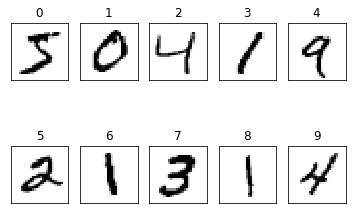

In [15]:
# Display data
fig, axes = plt.subplots(2,5, subplot_kw={"xticks":[], "yticks": []})
## makes 2*5 matrix

# axes.flat : returns the axes as 1-dimensional(flay) array
for ax, i in zip(axes.flat, range(0, 10)):
    all_values = train_list[i].split(',')
    # string to float, all_values[0] = label, transform to 28*28 matrix
    image_array = np.asfarray(all_values[1:]).reshape(28, 28)
    ax.imshow(image_array, cmap="Greys")
    ax.set_title(i)
fig.subplots_adjust(hspace=0.3)
plt.show()

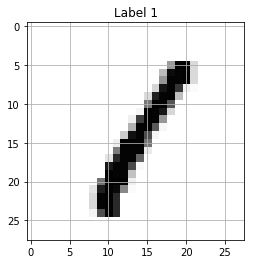

'1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,124,253,255,63,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,96,244,251,253,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,127,251,251,253,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,236,251,211,31,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,60,228,251,251,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,155,253,253,189,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,253,251,235,66,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,205,253,251,126,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,104,251,253,184,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,80,240,251,193,23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,32,253,253,253,159,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [21]:
# Display "1" data(with grid)
all_values = train_list[3].split(',')

# String to float, all_values[0] = label, transform to 28*28
image_array = np.asfarray(all_values[1:]).reshape(28, 28)

# draw image
plt.imshow(image_array, cmap="Greys")
plt.grid(True)
plt.title("Label {}".format(all_values[0]))
plt.show()

train_list[3]

In [22]:
# Normailize RGB Values
# +0.01 to prevent '0' as output
# '0' input makes activation function's output to '0'

norm_input = (np.asfarray(all_values[1:]) / 255 * 0.99 ) +0.01
print(norm_input)

[ 0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.01        0.01        0.01
  0.01        0.01        0.01        0.01        0.

In [25]:
# make output label array to put in NN
# range must to be 0 < X < 1 (Sigmoid) <- adjust weight

out_nodes = 10

# Target value(label)
# 1 -> 0.99, 0 -> 0.01 to satisty constraint

targets = np.zeros(out_nodes) + 0.01

# all_values[0] = label
targets[int(all_values[0])] = 0.99

# label = 1(index[1]=0.99)
targets ## index[1]=0.99 means. the # is 1.


array([ 0.01,  0.99,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01,  0.01])

## train the NN

In [40]:
# Define network structure

input_nodes = 784  # data = 28 * 28

# the number of hidden nodes : choose heuristically
# mush be smaller than input nodes to extract core feature
# Properly larget than output nodes

hidden_nodes = 100

# the number of output nodes : same as the number of labels
output_nodes = 10

# learning rate
learning_rate = 0.3

# make instance of NN
n = NeuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [41]:
# Train the NN
for record in train_list:
    # Split the csv data by seperator ','
    all_values = record.split(',')
    # Normalize input values
    inputs = (np.asfarray(all_values[1:]) / 255 * 0.99) + 0.01
    # Create target value
    targets = np.zeros(output_nodes) + 0.01
    targets[int(all_values[0])] = 0.99
    n.train(inputs, targets)
    pass

### test the NN

In [42]:
# load thest dataset
with open('./dataframe/[HYStudy 23th] mnist_test_10.csv', 'r') as f:
    test_list = f.readlines()

In [43]:
# test 1st data
test_values = test_list[0].split(',')
print("Correct answer is", test_values[0])

Correct answer is 7


In [49]:
# Send query with nomalized values
ans = n.query((np.asfarray(test_values[1:]) / 255.0 * 0.99) + 0.01)

print(ans)
print("maximum values is {} and index is {}".format(max(ans), np.argmax(ans)))
print("Predicted level is",np.argmax(ans)

SyntaxError: unexpected EOF while parsing (<ipython-input-49-481d677a1d58>, line 6)